In [ ]:
import pandas as pd
import numpy as np

# pre-processing
from sklearn import preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
# import contractions
from nltk.stem import WordNetLemmatizer



# vectorization, SVM model
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
# import scikitplot.metrics as skplt

# eval metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score, auc

# plotting
import matplotlib.pyplot as plt
#% matplotlib inline

In [ ]:
data = pd.read_csv('Book1.csv')
data

,Comment,Topic
0,Very hot and sexy nail color;),21
1,"I know, right? Like, an FMEA. I definitely kno...",28
2,"Hello, we only allow people with an account ag...",5
3,Megumin reads das kapital??? New best girl.,2
4,Freedom of speech ? but you use a random anon ...,13
...,...,...
9505,The water realistically only turns brown from ...,35
9506,I love her yellow eyes ,15
9507,Does Jeff George deserve a mention here.,29
9508,Bruh soundefect #2 plays,16


In [ ]:
data.shape

(9510, 2)

In [ ]:
def to_lower(words):
    words = "".join([str.lower(w) for w in words])
    return(words)

def rem_pun(words):
    text = "".join([ w for w in words if w not in string.punctuation])
    return(text)

def rem_stop(words):
    words = [w for w in words if w not in stopwords.words("english")]
    return(words)


In [ ]:
data["lower_case"] = data["Comment"].apply(lambda x: to_lower(x))
data["expand"] = data["lower_case"].apply(lambda x: rem_pun(x))

1     39
33    33
22    29
12    29
38    27
26    27
11    26
10    26
28    26
37    26
5     25
23    25
4     25
29    24
21    24
13    24
2     23
3     23
7     23
31    23
39    22
16    22
30    21
32    21
35    21
17    20
15    20
20    19
9     19
14    19
18    19
27    19
24    19
19    18
36    18
34    18
40    17
25    17
8     16
6     13
Name: Topic, dtype: int64


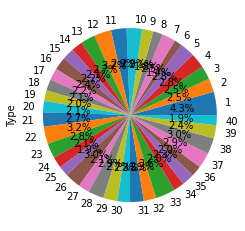

In [ ]:
print(data["Topic"].value_counts())

data.groupby('Topic').size().plot(kind='pie',
                                       y = "Topic",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
X_train1 = data['Comment']
X_train1
                                                   

0                          Very hot and sexy nail color;)
1       I know, right? Like, an FMEA. I definitely kno...
2       Hello, we only allow people with an account ag...
3             Megumin reads das kapital??? New best girl.
4       Freedom of speech ? but you use a random anon ...
                              ...                        
9505    The water realistically only turns brown from ...
9506                             I love her yellow eyes 
9507             Does Jeff George deserve a mention here.
9508                             Bruh soundefect #2 plays
9509              It is a coin of great value, after all.
Name: Comment, Length: 9510, dtype: object

In [ ]:
y_train=data['Topic']
y_train

0       21
1       28
2        5
3        2
4       13
        ..
9505    35
9506    15
9507    29
9508    16
9509    19
Name: Topic, Length: 9510, dtype: int64

In [ ]:
X_train=X_train1.tolist()

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer,util

In [ ]:
## Running the BERT base model
model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
vect_train_1 = model.encode(X_train, show_progress_bar = True)

Batches:   0%|          | 0/298 [00:00<?, ?it/s]

## LGBoost

In [ ]:
#! pip install lightgbm

In [ ]:
# Running LGBoost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

# define the model
model = LGBMClassifier(objective='multiclass', random_state=5)
model.fit(vect_train_1, y_train)


LGBMClassifier(objective='multiclass', random_state=5)

In [ ]:
# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, vect_train_1, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 


## KNN

In [ ]:
## Running KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(vect_train_1, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# evaluate the KNN model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, vect_train_1, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 


Accuracy: 0.387 (0.009)


## QDA

In [ ]:
### running qda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(vect_train_1, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
# evaluate the qda model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, vect_train_1, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 


Accuracy: 0.040 (0.004)


## XGBoost

In [ ]:
# Running XGBoost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define the model
model = XGBClassifier(objective='multiclass', random_state=5)
model.fit(vect_train_1, y_train)

XGBClassifier(objective='multi:softprob', random_state=5)

In [ ]:
# evaluate the XGboost model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, vect_train_1, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 


Accuracy: 0.089 (0.006)


## AdaBoost

In [ ]:
# Running AdaBoost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

# define the model
model = AdaBoostClassifier(random_state=5)
model.fit(vect_train_1, y_train)

AdaBoostClassifier(random_state=5)

In [ ]:
# evaluate the  model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, vect_train_1, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 


Accuracy: 0.068 (0.009)


## TFIDF + LGBM

In [ ]:
X_train1 = data['Comment']
y_train=data['Topic']

X_train=X_train1.tolist()

tfidf_vectorizer = TfidfVectorizer(max_df=0.50, min_df=2, max_features=100, stop_words='english')
vect_train_1 = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
# Running LGBoost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

# define the model
model = LGBMClassifier(objective='multiclass', random_state=5)
model.fit(vect_train_1, y_train)

LGBMClassifier(objective='multiclass', random_state=5)

In [ ]:
# evaluate the model through K-Fold Cross alidation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, vect_train_1, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 

Accuracy: 0.087 (0.005)


## W2V + LGBM

In [ ]:
i=0
list_of_sent=[]
for sent in X_train1:
    list_of_sent.append(sent.split())
    



In [ ]:
import gensim

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

w2v_model=gensim.models.Word2Vec(list_of_sent,
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            vector_size = 100,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34)

In [ ]:
w2v_words = list(w2v_model.wv.index_to_key)
print("sample words ", w2v_words[0:100])

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

In [ ]:
w2v_train=sent_vectors


In [ ]:
# Running LGBoost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

# define the model
model = LGBMClassifier(objective='multiclass', random_state=5)
model.fit(w2v_train, y_train)

In [ ]:
# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, w2v_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
